1) Determinar las galaxias miembro del cúmulo de Coma. Para esto considerar valores adecuados de distancia proyectada (rp) y diferencia de velocidad radial (dV) de las galaxias respecto al centro del cúmulo cuyas coordenadas son alfaC=194.9531°, deltaC= 27.9807° J2000; y el redshift zC=0.0231. Tener en cuenta que el radio de un cúmulo masivo es de alrededor de 1,5Mpc, y la diferencia de dispersión de velocidades del orden de 1000 km/s.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
table = pd.read_fwf('Campo_ComaCluster_TP2024_Topicos.dat')

In [4]:
#some util stadistics 
z_median=table['z'].median()
z_mean=table['z'].mean()
z=table['z']
z_sigma=table['z'].std()
z_ned = 0.0231
z_ned_std = 1.30e-4
z_median_q0 = np.percentile(table['z'], 0)
z_median_q1 = np.percentile(table['z'], 25)
z_median_q3 = np.percentile(table['z'], 75)


print(f'the median is: {z_median}, and the mean is: {z_mean}')

the median is: 0.0247810155, and the mean is: 0.026556716286670546


In [5]:
#in velocity
z=table['z']

vel_ned = 0.0231 * 299792
vel_ned_up = vel_ned+1000
vel_ned_bot = vel_ned-1000
vel = z*299792

vel_median=vel.median()
vel_mean=vel.mean()
vel_sigma=vel.std()

vel_median_q0 = np.percentile(vel, 0)
vel_median_q1 = np.percentile(vel, 25)
vel_median_q3 = np.percentile(vel, 75)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_38544/4044310128.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.vlines([vel_mean-vel_sigma, vel_mean+vel_sigma], ymin=[0,0], ymax=[150,150], colors='#F3CFC6', label='$\sigma$ of velocity')


Text(0.5, 1.0, 'Velocity distribution for Coma Cluster')

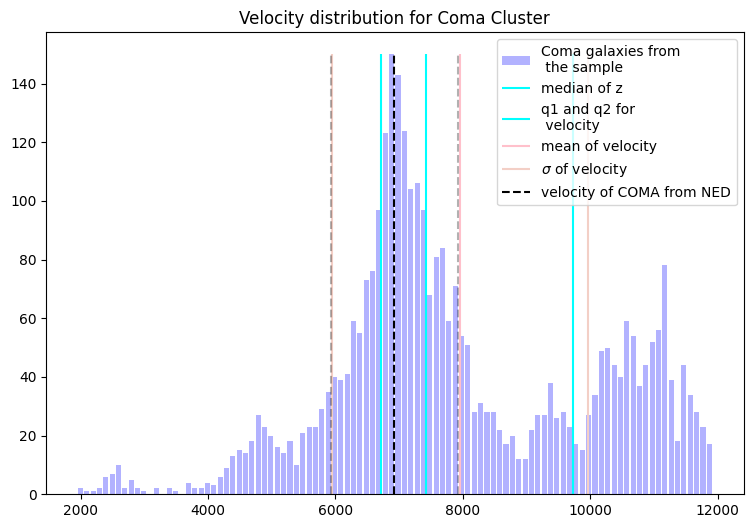

In [6]:
plt.figure(figsize=(9,6))
plt.hist(vel, bins=100, color='blue', alpha=0.3, rwidth=0.8 ,label='Coma galaxies from \n the sample')
plt.vlines(vel_median, ymin=0, ymax=150, colors='cyan', label='median of z')
plt.vlines([vel_median_q1,vel_median_q3], ymin=[0,0], ymax=[150,150], colors='cyan', label='q1 and q2 for \n velocity')
plt.vlines(vel_mean, ymin=0, ymax=150, colors='pink', label='mean of velocity')
plt.vlines([vel_mean-vel_sigma, vel_mean+vel_sigma], ymin=[0,0], ymax=[150,150], colors='#F3CFC6', label='$\sigma$ of velocity')
plt.vlines([vel_ned], ymin=[0], ymax=[150], colors='black', linestyle='dashed', label='velocity of COMA from NED')
plt.vlines([vel_ned_bot, vel_ned_up], [0,0], [150,150], colors= 'black', linestyle='dashed', alpha=0.3)
plt.legend()
plt.title('Velocity distribution for Coma Cluster')

In [7]:
cluster = table[table['rp'] <= (1.78)*0.6779] 
cluster2 = cluster[cluster['dV'] <= 1000]

In [8]:
cluster.keys()

Index(['#', 'objID', 'ra', 'dec', 'z', 'rp', 'dV', 'Mr', 'gr', 'C', 'dn4000',
       'logSSFR', 'logSM'],
      dtype='object')

Text(0.5, 0, 'RA J2000')

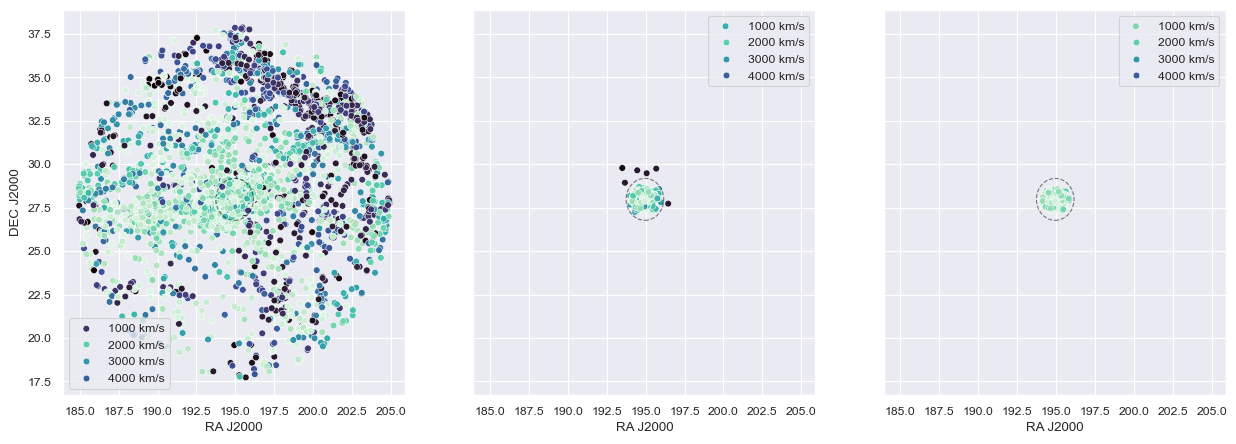

In [9]:
sns.set_theme('paper')

fig, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

sns.scatterplot(ax=axes[0], x=table['ra'], y=table['dec'], hue=table['dV'], legend=True, palette='mako_r')
circle = plt.Circle((194.9531,27.9807), 1.78*0.6779, color='black', fill=False, linestyle='--', 
                    alpha=.5, label='Radius from Ho+2022')
axes[0].add_patch(circle)
axes[0].legend(labels=['1000 km/s', '2000 km/s', '3000 km/s', '4000 km/s'])
axes[0].set_xlabel('RA J2000')
axes[0].set_ylabel('DEC J2000')

sns.scatterplot(ax=axes[1], x=cluster['ra'], y=cluster['dec'], hue=table['dV'], palette='mako_r')
circle2 = plt.Circle((194.9531,27.9807), 1.78*0.6779, color='black', fill=False, linestyle='--', 
                     alpha=.5, label='Radius from Ho+2022')
axes[1].add_patch(circle2)
axes[1].legend(labels=['1000 km/s', '2000 km/s', '3000 km/s', '4000 km/s'])
axes[1].set_xlabel('RA J2000')



sns.scatterplot(ax=axes[2], x=cluster2['ra'], y=cluster2['dec'], hue=table['dV'], palette='mako_r')
circle3 = plt.Circle((194.9531,27.9807), 1.78*0.6779, color='black', fill=False, linestyle='--', 
                     alpha=.5, label='Radius from Ho+2022')
axes[2].add_patch(circle3)
axes[2].legend(labels=['1000 km/s', '2000 km/s', '3000 km/s', '4000 km/s'])
axes[2].set_xlabel('RA J2000')



In [10]:
table = table[table['dV'] < 1000]

inter_R = table[table['rp'] <= 0.5]  
medium_R = table[(table['rp']> 0.5 ) & (table['rp'] <= 1.5)]
outskirts_R = table[(table['rp']>1.5) & (table['rp'] <= 2.5)]
extern_R = table[table['rp'] > 2.5]

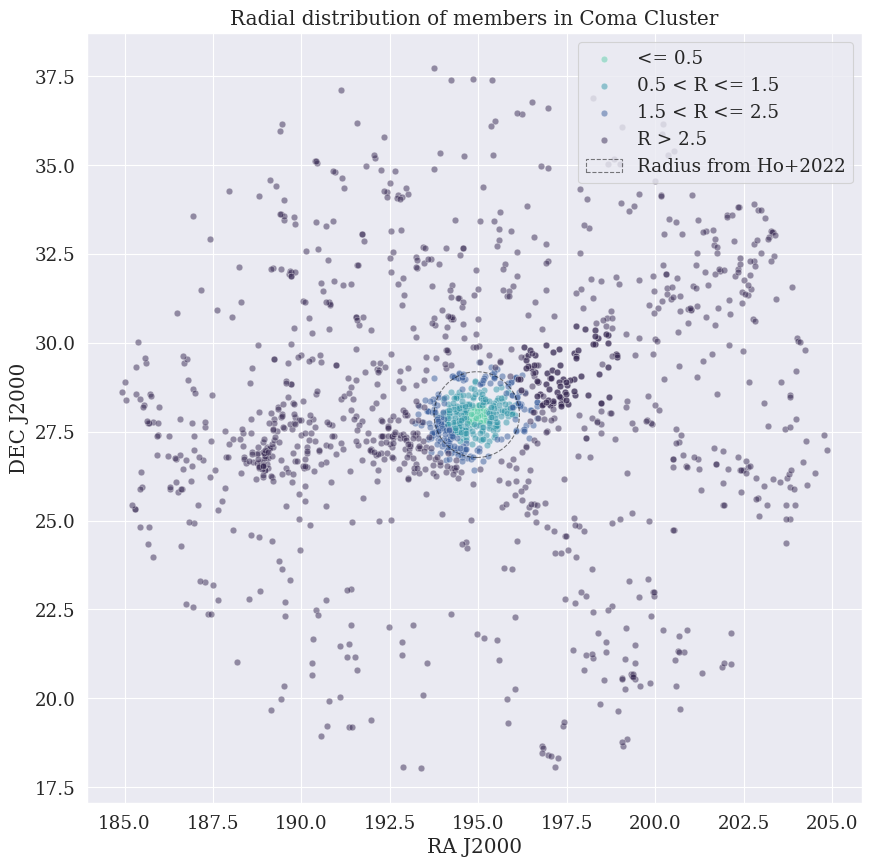

In [58]:
sns.set_theme('paper', font_scale=1.5, font='serif')
colors= ['#0b0405', '#382a54', '#395d9c', '#3497a9', '#60ceac', '#def5e5']

fig, axes = plt.subplots(1,1, figsize=(10,10))

sns.scatterplot(ax=axes, x=inter_R['ra'], y=inter_R['dec'], color = colors[4], label='<= 0.5', sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes, x=medium_R['ra'], y=medium_R['dec'], color=colors[3], label='0.5 < R <= 1.5', sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes, x=outskirts_R['ra'], y=outskirts_R['dec'], color=colors[2], label='1.5 < R <= 2.5', sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes, x=extern_R['ra'], y=extern_R['dec'], color=colors[1], label='R > 2.5', sizes=(10, 400), alpha=.5)

circle = plt.Circle((194.9531,27.9807), 1.78*0.6779, color='black', fill=False, linestyle='--', 
                    alpha=.5, label='Radius from Ho+2022')
axes.add_patch(circle)


axes.legend()
axes.set_title('Radial distribution of members in Coma Cluster')
axes.set_xlabel('RA J2000')
axes.set_ylabel('DEC J2000')
plt.show()

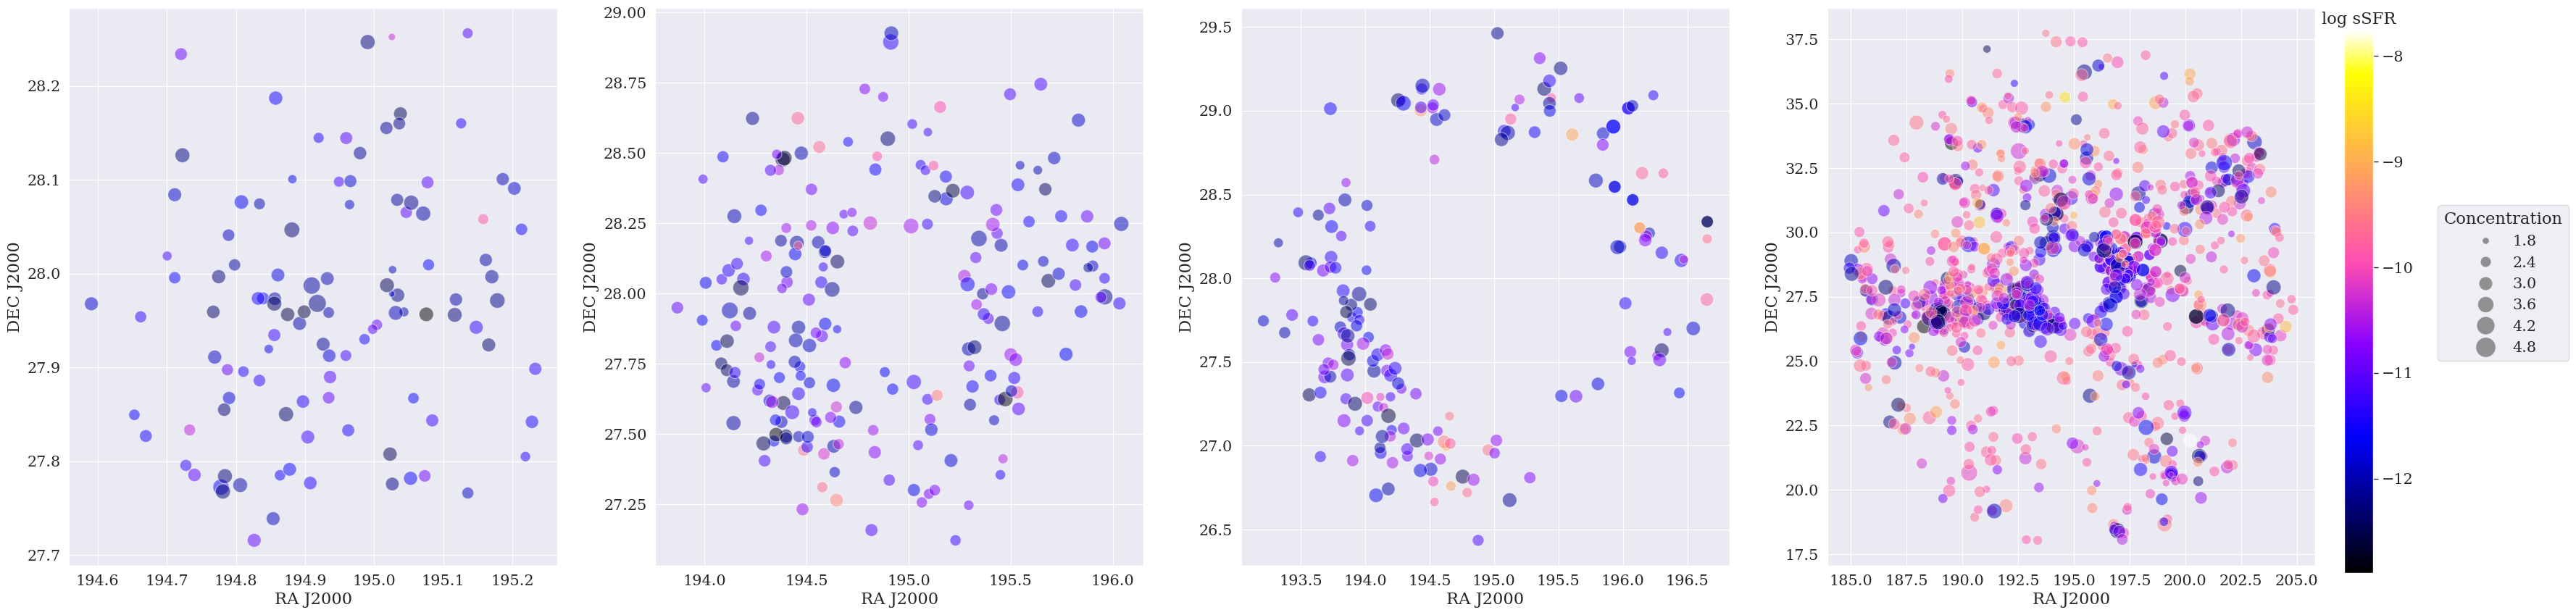

In [53]:
sns.set_theme('paper', font_scale=1.7, font='serif')

fig, axes = plt.subplots(1,4, figsize=(40,10))

sns.scatterplot(ax=axes[0], x=inter_R['ra'], y=inter_R['dec'], s=6, hue=table['logSSFR'], palette='gnuplot2', size=table['C'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[1], x=medium_R['ra'], y=medium_R['dec'], s=6, hue=table['logSSFR'], palette='gnuplot2', size=table['C'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[2], x=outskirts_R['ra'], y=outskirts_R['dec'], s=6, hue=table['logSSFR'], palette='gnuplot2', size=table['C'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[3], x=extern_R['ra'], y=extern_R['dec'], s=6, hue=table['logSSFR'], palette='gnuplot2', size=table['C'], sizes=(10, 400), alpha=.5)

norm = plt.Normalize(table['logSSFR'].min(), table['logSSFR'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot2", norm=norm)
sm.set_array([])

for i in range((len(axes))):
    axes[i].set_xlabel('RA J2000')
    axes[i].set_ylabel('DEC J2000')
    axes[i].get_legend().remove()


cax = fig.add_axes([0.91, 0.1, 0.01, 0.75])
cax.set_title('log sSFR')
fig.colorbar(sm, cax=cax)


concentration = axes[0].get_legend_handles_labels()[1][7:]
concentration_icons = axes[0].get_legend_handles_labels()[0][7:]


fig.legend(concentration_icons, concentration, loc="right", title='Concentration', fancybox=True, bbox_to_anchor=(0.99, 0.5)) 

plt.show()

In [16]:
table.keys()

Index(['#', 'objID', 'ra', 'dec', 'z', 'rp', 'dV', 'Mr', 'gr', 'C', 'dn4000',
       'logSSFR', 'logSM'],
      dtype='object')

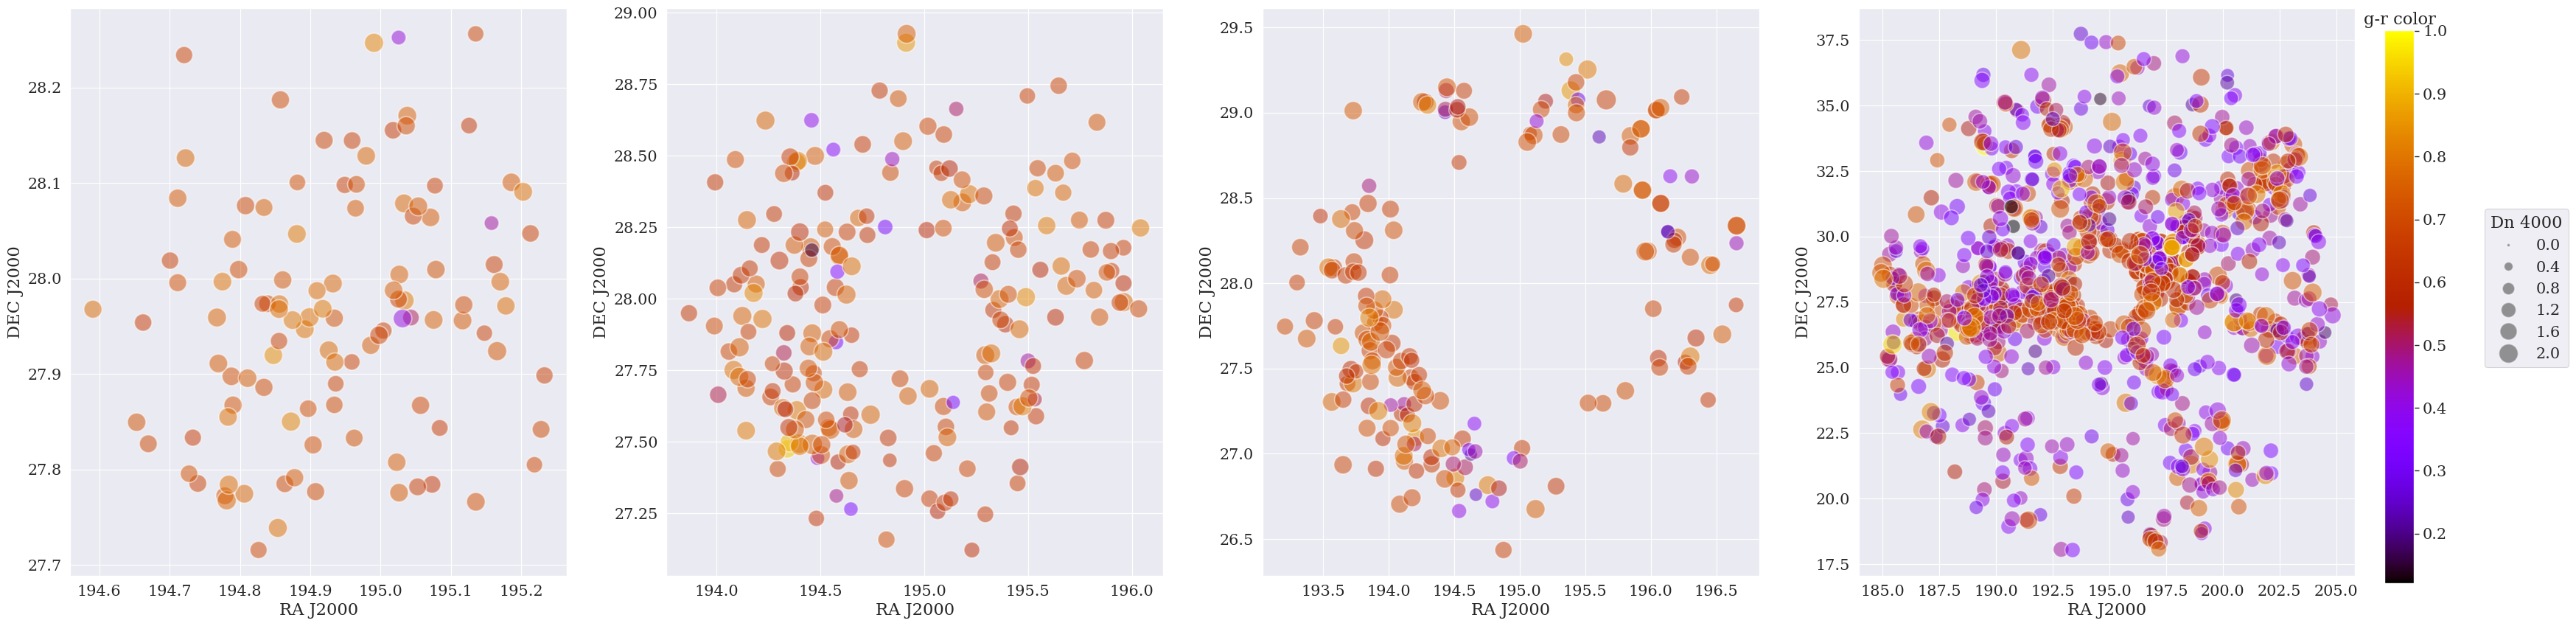

In [62]:
sns.set_theme('paper', font_scale=1.7, font='serif')

fig, axes = plt.subplots(1,4, figsize=(40,10))

sns.scatterplot(ax=axes[0], x=inter_R['ra'], y=inter_R['dec'], s=8, hue=table['gr'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[1], x=medium_R['ra'], y=medium_R['dec'], s=8, hue=table['gr'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[2], x=outskirts_R['ra'], y=outskirts_R['dec'], s=8, hue=table['gr'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[3], x=extern_R['ra'], y=extern_R['dec'], s=8, hue=table['gr'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)

norm = plt.Normalize(table['gr'].min(), table['gr'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])


cax = fig.add_axes([0.91, 0.1, 0.01, 0.75])
cax.set_title('g-r color')
fig.colorbar(sm, cax=cax)


dn4000 = axes[0].get_legend_handles_labels()[1][8:]
dn4000_icons = axes[0].get_legend_handles_labels()[0][8:]

for i in range((len(axes))):
    axes[i].set_xlabel('RA J2000')
    axes[i].set_ylabel('DEC J2000')
    axes[i].get_legend().remove()

fig.legend(dn4000_icons, dn4000, loc="right", title='Dn 4000', fancybox=True, bbox_to_anchor=(0.975, 0.5)) 

plt.show()

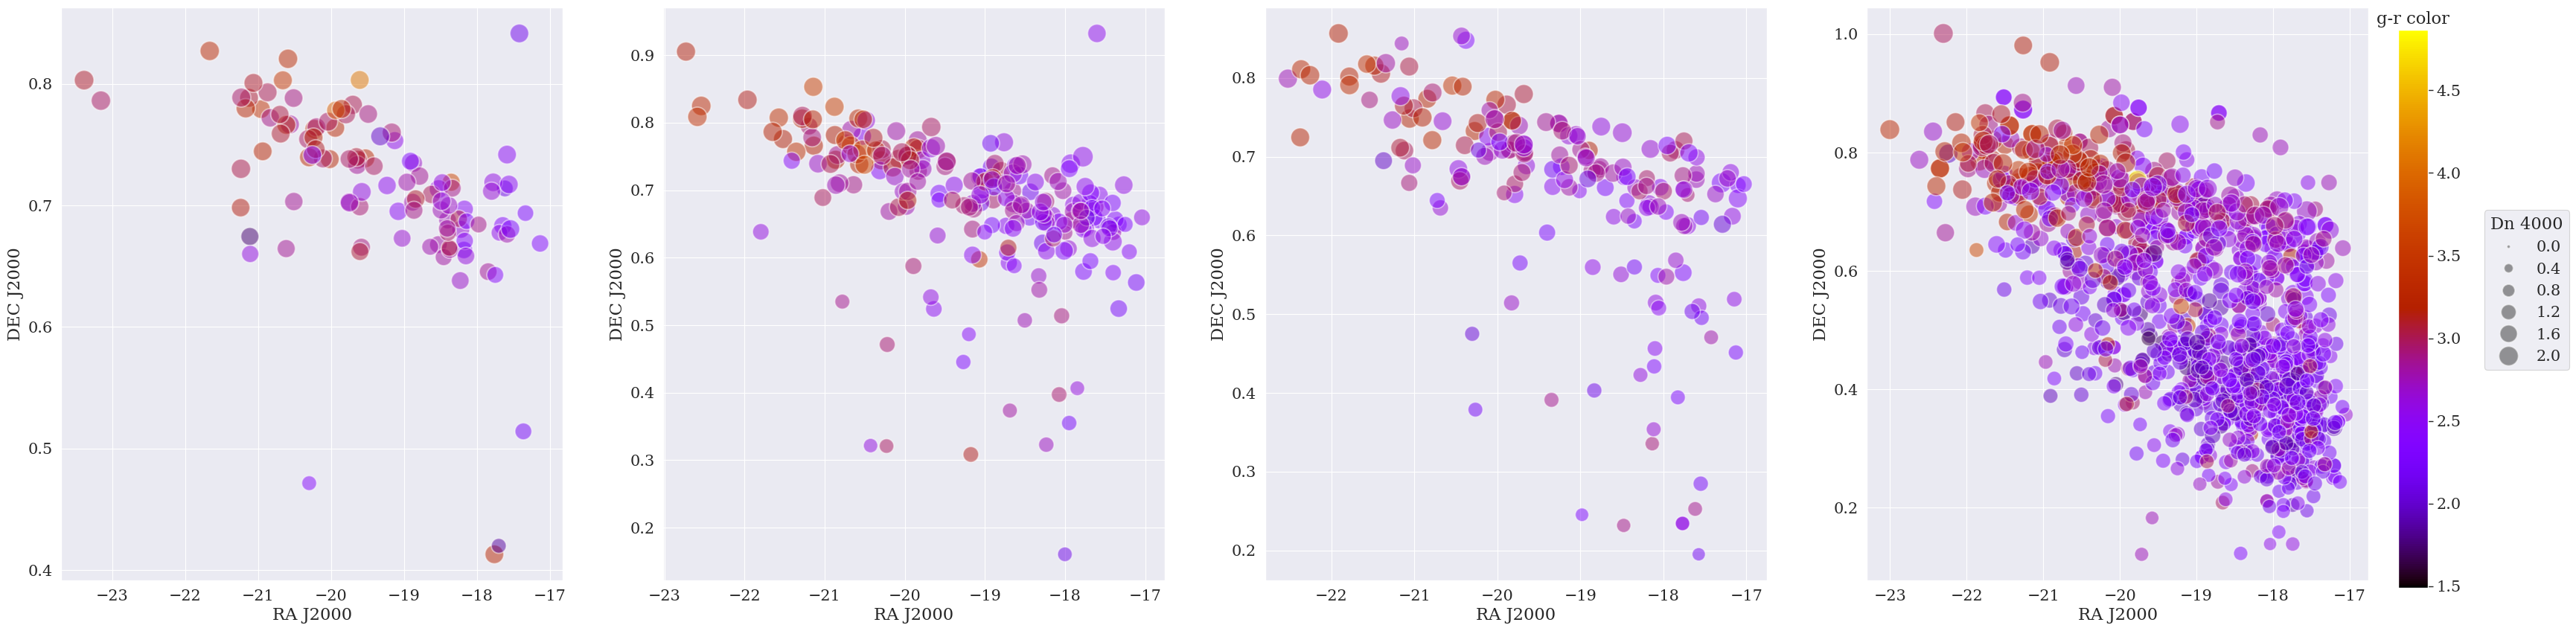

In [61]:
sns.set_theme('paper', font_scale=1.7, font='serif')

fig, axes = plt.subplots(1,4, figsize=(40,10))

sns.scatterplot(ax=axes[0], x=inter_R['Mr'], y=inter_R['gr'], hue=table['C'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[1], x=medium_R['Mr'], y=medium_R['gr'], hue=table['C'], palette='gnuplot', size=table['dn4000'],  sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[2], x=outskirts_R['Mr'], y=outskirts_R['gr'], hue=table['C'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)
sns.scatterplot(ax=axes[3], x=extern_R['Mr'], y=extern_R['gr'], hue=table['C'], palette='gnuplot', size=table['dn4000'], sizes=(10, 400), alpha=.5)

norm = plt.Normalize(table['C'].min(), table['C'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])


cax = fig.add_axes([0.91, 0.1, 0.01, 0.75])
cax.set_title('g-r color')
fig.colorbar(sm, cax=cax)


dn4000 = axes[0].get_legend_handles_labels()[1][8:]
dn4000_icons = axes[0].get_legend_handles_labels()[0][8:]

for i in range((len(axes))):
    axes[i].set_xlabel('RA J2000')
    axes[i].set_ylabel('DEC J2000')
    axes[i].get_legend().remove()

fig.legend(dn4000_icons, dn4000, loc="right", title='Dn 4000', fancybox=True, bbox_to_anchor=(0.97, 0.5)) 

plt.show()

In [90]:
cluster2

,#,objID,ra,dec,z,rp,dV,Mr,gr,C,dn4000,logSSFR,logSM
745,NaN,1237665440442351685,195.546419,28.456614,0.020483,1.077306,785.095468,-18.434190,0.697557,2.150762,1.610649,-11.918041,9.381130
769,NaN,1237665440442155329,195.059241,28.458066,0.026103,0.942798,900.777951,-17.580293,0.654424,2.364597,1.277500,-11.355979,8.972361
775,NaN,1237665440442089547,194.837550,28.441477,0.021894,0.768187,361.696482,-18.027687,0.699123,2.800435,1.647893,-11.543867,9.251284
836,NaN,1237665440441892891,194.383143,28.476943,0.022568,1.184323,159.702674,-22.539705,0.824766,3.297455,2.024594,-12.464679,11.187171
870,NaN,1237665440441892890,194.391192,28.482257,0.020874,1.094224,667.680651,-21.572753,0.807384,3.413183,1.982880,-12.663942,10.782637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,NaN,1237667444585332963,194.524303,28.370958,0.025450,1.026845,704.923048,-19.591515,0.632823,2.659951,1.504554,-10.881639,9.803107
3427,NaN,1237667444048592965,194.727649,27.795617,0.021582,0.436461,455.381014,-18.473980,0.718755,2.609152,1.659432,-11.319202,9.654596
3428,NaN,1237667444048658808,194.936228,27.889762,0.022707,0.155530,118.028410,-17.975009,0.684276,2.886647,1.485714,-11.077778,9.209383
3433,NaN,1237667443511656567,194.506495,27.489666,0.025431,1.190528,699.184239,-20.860050,0.707482,2.767293,1.796926,-11.795789,10.459375


In [93]:
#to search in SDSS
sample = cluster2.sample(frac=0.2)
a = sample['ra'] 
b = sample['dec']
df = a,b
df = pd.DataFrame(df)
df = df.T
df.to_clipboard()

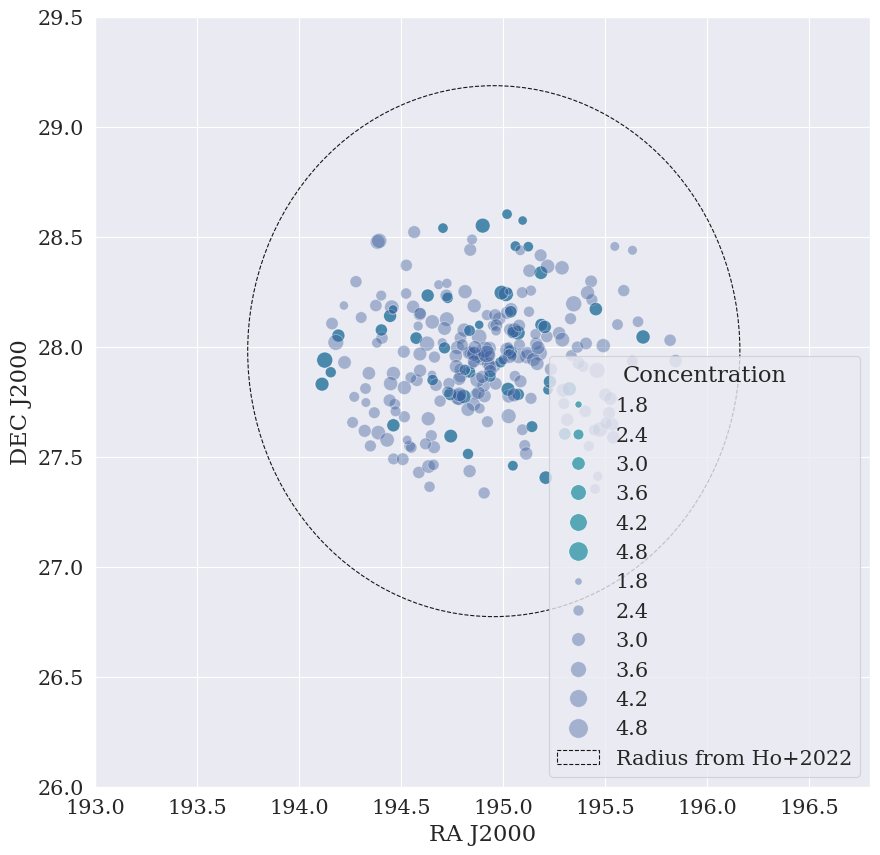

In [98]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
sns.scatterplot(x=sample['ra'], y=sample['dec'], size=table['C'], sizes=(10,200), alpha=0.8, color=colors[3])
sns.scatterplot(x=cluster['ra'], y=cluster['dec'], size=table['C'], sizes=(10,200), alpha=0.4, color=colors[2])
circle = plt.Circle((194.9531,27.9807), 1.78*0.6779, color='black', fill=False, linestyle='--', 
                    alpha=.9, label='Radius from Ho+2022')
axes.add_patch(circle)

axes.legend(title='Concentration')
axes.set_xlabel('RA J2000')
axes.set_ylabel('DEC J2000')
axes.set_xlim(193, 196.8)
axes.set_ylim(26, 29.5)

plt.show()
